<h1 align='center''>Standard Error of Mean</h1>

----


This Notebooks provides a professional exploration of the **Standard Error of the Mean (SEM)**, a key statistical measure used to quantify the precision of sample means in relation to the population mean. It includes detailed explanations, Python implementations, and practical examples that demonstrate how SEM is calculated, interpreted, and applied in real-world data analysis. The project is designed for students, researchers, and data analysts seeking to strengthen their understanding of inferential statistics and improve their ability to assess sampling variability with confidence.


<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h1>

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.random.seed(42)

print("\n----- Libraries Loaded Successfully -----\n")


----- Libraries Loaded Successfully -----



<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>2.0. Standard Error of Mean
 Demostration</h1>

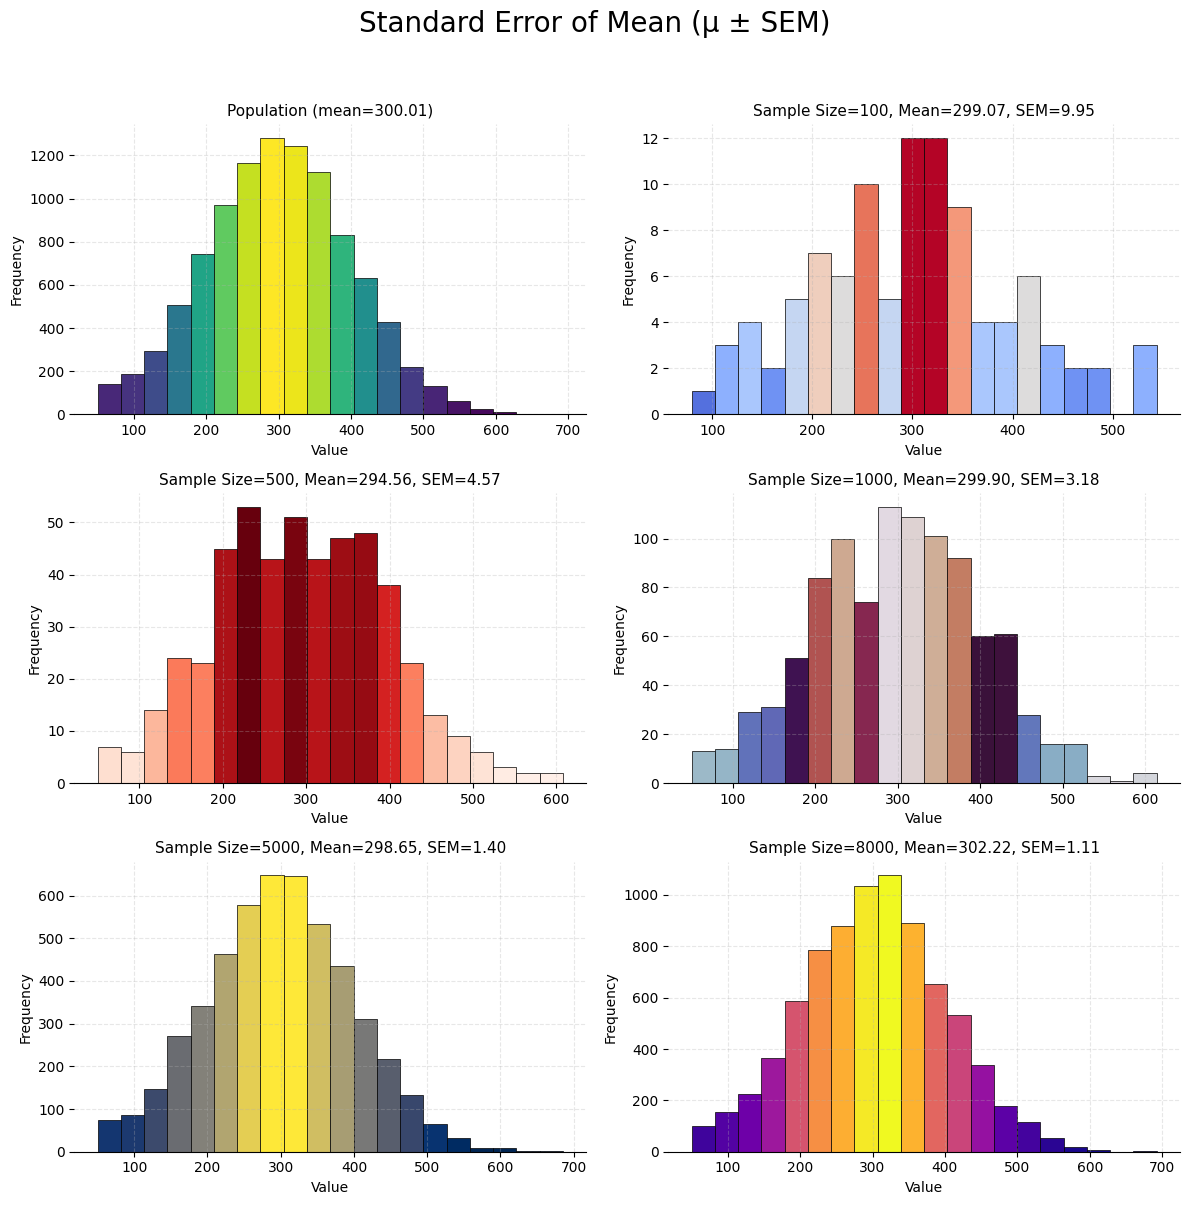

In [2]:
def plot_hist(ax, data, title, cmap):
    n, bins, patches = ax.hist(data, bins=20, edgecolor='black', linewidth=0.5, alpha=1)
    for i in range(len(patches)): patches[i].set_facecolor(cmap(n[i] / max(n)))
    ax.set_title(title, fontsize=11)
    sns.despine(left=True, right=True, bottom=False, ax=ax)
    ax.grid(linestyle='--', alpha=0.3)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')

def visualize_sem(original_data, sample_sizes, cols=2):
    n_plots = len(sample_sizes) + 1
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    #plt.rcParams.update({'font.family': 'Candara', 'font.size': 11})
    plt.suptitle('Standard Error of Mean (μ ± SEM)', fontsize=20, y=1.0)
    axes = axes.flatten()  # make it iterable

    original_mean = np.mean(original_data)
    plot_hist(axes[0], original_data, f'Population (mean={original_mean:.2f})', plt.cm.viridis)
    colormaps = [plt.cm.coolwarm, plt.cm.Reds, plt.cm.twilight, plt.cm.cividis, plt.cm.plasma]
    
    for i, (size, cmap) in enumerate(zip(sample_sizes, colormaps), start=1):
        sample = np.random.choice(original_data, size=size, replace=True)
        mean, sem = np.mean(sample), stats.sem(sample)
        title = f'Sample Size={size}, Mean={mean:.2f}, SEM={sem:.2f}'
        plot_hist(axes[i], sample, title, cmap)
    
    for j in range(n_plots, len(axes)): fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

if __name__ == "__main__":
    original_data = np.random.normal(loc=300, scale=100, size=10000)
    original_data = np.clip(original_data, 50, 1000)

    sample_sizes = [100, 500, 1000, 5000, 8000]
    visualize_sem(original_data, sample_sizes)
    

In [3]:
def grouped_summary_stats(df: pd.DataFrame, group: str, variables: list = None) -> pd.DataFrame:
    if variables is None: variables = df.select_dtypes(include="number").columns.tolist()
    grouped_stats = df.groupby(group)[variables].agg(['mean', 'sem']).reset_index()
    summary_df = pd.DataFrame()
    summary_df[group] = grouped_stats[group]
    for col in variables: 
        summary_df[col] = grouped_stats.apply(
            lambda row: f"{row[(col, 'mean')]:.2f} ± {row[(col, 'sem')]:.2f}", axis=1)
    return summary_df

if __name__ == "__main__":
    df = pd.read_csv("./Datasets/Soil Survey Dataset 2025.csv")
    results = grouped_summary_stats(df, group="Site")
    display(results.T)

,0,1,2,3
Site,Hillside,Lowland,Riverine,Upland
Ph,6.00 ± 0.04,6.31 ± 0.04,6.44 ± 0.04,6.12 ± 0.03
Organic Matter %,1.97 ± 0.07,2.48 ± 0.06,2.88 ± 0.07,2.09 ± 0.06
Nitrogen %,0.16 ± 0.01,0.20 ± 0.01,0.21 ± 0.01,0.17 ± 0.01
Phosphorus Mg/Kg,8.62 ± 0.53,14.79 ± 0.57,17.40 ± 0.53,9.98 ± 0.55
Potassium Cmol(+)/Kg,0.28 ± 0.01,0.40 ± 0.01,0.43 ± 0.01,0.33 ± 0.01
Cec Cmol(+)/Kg,9.67 ± 0.34,10.41 ± 0.37,10.53 ± 0.34,9.35 ± 0.29
Bulk Density G/Cm3,1.30 ± 0.01,1.21 ± 0.01,1.19 ± 0.01,1.29 ± 0.01
Electrical Conductivity Ds/M,0.17 ± 0.01,0.23 ± 0.01,0.26 ± 0.01,0.20 ± 0.01
Yield T/Ha,3.81 ± 0.07,4.74 ± 0.07,5.11 ± 0.06,4.05 ± 0.06


---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions.

---

<h1 align='center''>Data to Drive Meaningful Insights and Solutions</h1>